In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
dataset = pd.read_csv('Datagaji - Sheet1.csv')

In [21]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,13764361,Female,20,20000,0
1,13462415,Male,22,30000,0
2,13028638,Male,19,15000,0
3,13256883,Male,22,40000,1
4,13462973,Female,23,25000,0


In [22]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, -1].values

In [23]:
print(x)

[[   20 20000]
 [   22 30000]
 [   19 15000]
 [   22 40000]
 [   23 25000]
 [   28 60000]
 [   26 50000]
 [   29 85000]
 [   19 15000]]


In [24]:
print(x)

[[   20 20000]
 [   22 30000]
 [   19 15000]
 [   22 40000]
 [   23 25000]
 [   28 60000]
 [   26 50000]
 [   29 85000]
 [   19 15000]]


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [26]:
print(x_train)

[[   23 25000]
 [   19 15000]
 [   26 50000]
 [   22 40000]
 [   20 20000]
 [   28 60000]]


In [27]:
len(x_train)

6

In [28]:
len(x)

9

In [29]:
len(x_test)

3

In [30]:
len(y)

9

In [31]:
len(y_test)

3

In [32]:
len(y_train)

6

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
print(x_train)

[[ 0.         -0.61237244]
 [-1.26491106 -1.22474487]
 [ 0.9486833   0.91855865]
 [-0.31622777  0.30618622]
 [-0.9486833  -0.91855865]
 [ 1.58113883  1.53093109]]


In [35]:
print(x_test)

[[ 1.8973666   3.06186218]
 [-1.26491106 -1.22474487]
 [-0.31622777 -0.30618622]]


In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = classifier.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


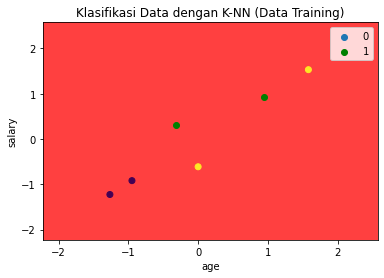

In [39]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red' , 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('age')
plt.ylabel('salary')
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red' , 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Testing)')
plt.xlabel('age')
plt.ylabel('salary')
plt.legend()
plt.show()